In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
# Reading the dataset
crimes = pd.read_pickle('cleaned_ChicagoCrimes.pkl')
crimes.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Day Of Week
60332,2019-01-03 19:20:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,0,0,16.0,26,1100374.0,1943906.0,2019,42.002816,-87.906094,"(42.002816387, -87.90609433)",1,3,19,3
62258,2019-03-16 17:58:00,BATTERY,SIMPLE,STREET,0,0,1.0,08B,1174723.0,1900866.0,2019,41.883369,-87.633860,"(41.88336939, -87.633860272)",3,16,17,5
62600,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),0,0,2.0,06,1182276.0,1879784.0,2019,41.825347,-87.606781,"(41.825346902, -87.606780575)",3,12,22,1
62633,2019-03-14 18:42:00,BATTERY,SIMPLE,RESIDENCE,0,0,24.0,08B,1163827.0,1949311.0,2019,42.016542,-87.672499,"(42.016541612, -87.672499325)",3,14,18,3
62634,2019-03-14 16:03:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,0,1,2.0,26,1182227.0,1879766.0,2019,41.825299,-87.606961,"(41.825298645, -87.6069609)",3,14,16,3


In [30]:
# Dropping the unwanted columns
crimes.drop(['Date','Location'],axis=1,inplace=True)

In [31]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514457 entries, 60332 to 7069279
Data columns (total 16 columns):
Primary Type            object
Description             object
Location Description    object
Arrest                  int64
Domestic                int64
District                float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
Day Of Week             int64
dtypes: float64(5), int64(7), object(4)
memory usage: 844.9+ MB


In [32]:
# Check for missing Values
crimes.isnull().sum()

Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
Month                   0
Day                     0
Hour                    0
Day Of Week             0
dtype: int64

In [33]:
labels = ['Primary Type','Description','Location Description','FBI Code',]
le = LabelEncoder()
pt_labels = le.fit_transform(crimes['Primary Type'])
desc_labels = le.fit_transform(crimes['Description'])
Location_labels = le.fit_transform(crimes['Location Description'])
fbi_labels = le.fit_transform(crimes['FBI Code'])
crimes['Primary Type'] = pt_labels
crimes['Description'] = desc_labels
crimes['Location Description'] = Location_labels
crimes['FBI Code'] = fbi_labels
crimes.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514457 entries, 60332 to 7069279
Data columns (total 16 columns):
Primary Type            int32
Description             int32
Location Description    int32
Arrest                  int64
Domestic                int64
District                float64
FBI Code                int32
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
Day Of Week             int64
dtypes: float64(5), int32(4), int64(7)
memory usage: 745.5 MB


In [34]:
# Spliting the data 
X = crimes.drop(['Arrest'],axis=1).values
y = crimes.Arrest.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
print('X training shape :',X_train.shape)
print('X testing shape :',X_test.shape)
print('y training shape :',y_train.shape)
print('y testing shape :',y_test.shape)

X training shape : (4560119, 15)
X testing shape : (1954338, 15)
y training shape : (4560119,)
y testing shape : (1954338,)


In [36]:
# logistic Regression
lg  = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [37]:
print(lg.score(X_test,y_test))

0.7263917500452839


In [38]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Testing accuracy',lg.score(X_test,y_test))
print('training ',lg.score(X_train,y_train))

Accuracy: 0.7263917500452839
Testing accuracy 0.7263917500452839
training  0.7262893797289062


In [39]:
print('Confusion Matrix')
print('-----------------')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
-----------------
[[1419593      24]
 [ 534699      22]]


In [40]:
conf_matrix=pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_matrix.index = ['Actual False','Actual True']
conf_matrix.columns = ['Predicted False','Predicted True']
conf_matrix

,Predicted False,Predicted True
Actual False,1419593,24
Actual True,534699,22


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84   1419617
           1       0.48      0.00      0.00    534721

    accuracy                           0.73   1954338
   macro avg       0.60      0.50      0.42   1954338
weighted avg       0.66      0.73      0.61   1954338



In [42]:
print('Accuracy from confusion Matrix:',(1419593+22)/(1419593+22+534699+24))
print('Misclassification Rate:',(24+534699)/(1419593+22+534699+24))
# True Positive Rate: actually yes and how often it is predicted as yes: recall or sensitivity:tp/actual yes
print('True Positive Rate:',(22)/(534699+22))
# tp/predicted
print('Precision:',22/(22+24))

Accuracy from confusion Matrix: 0.7263917500452839
Misclassification Rate: 0.2736082499547161
True Positive Rate: 4.114295118388842e-05
Precision: 0.4782608695652174


In [44]:
fpr,tpr,thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1])
print('AUC Score',roc_auc_score(y_test,y_pred))

AUC Score 0.500012118491442


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import warnings

# Create the hyperparameter grid
c_space = [0.001, 0.1, 1, 10, 100] 
param_grid = {'C': c_space, 'penalty': ['l2']}

# Instantiate the logistic regression classifier: logregw
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid ,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

print('Accuracy Score:', accuracy_score(logreg_cv.predict(X_test), y_test))

Tuned Logistic Regression Parameter: {'C': 0.001, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7262911340697576
Accuracy Score: 0.7263917500452839


# Decision Trees

In [20]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)[:,1]

In [21]:
print('Accuracy:',accuracy_score(y_test,dt_pred))

Accuracy: 0.8270836467386911


In [22]:
print(confusion_matrix(y_test,dt_pred))

[[1240073  179544]
 [ 158393  376328]]


In [23]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88   1419617
           1       0.68      0.70      0.69    534721

    accuracy                           0.83   1954338
   macro avg       0.78      0.79      0.79   1954338
weighted avg       0.83      0.83      0.83   1954338



AUC Score 0.78865514678173


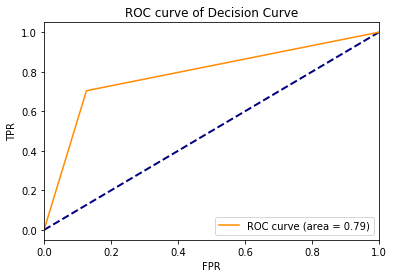

In [25]:
fpr,tpr,thresholds = roc_curve(y_test,dt.predict_proba(X_test)[:,1])
print('AUC Score',roc_auc_score(y_test,dt_pred))
fpr,tpr,thresholds = roc_curve(y_test,dt_pred_proba)
roc_auc = auc(fpr,tpr)
plt.title('ROC curve of Decision Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,color='darkorange',label ='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import warnings

# Create the hyperparameter grid

param_grid = {'criterion' : ['gini', 'entropy'],
              'splitter'  : ['best', 'random'],
              'max_depth' : [4,6,8,12]
            }

# Instantiate the logistic regression classifier: logregw
dt = dt

# Instantiate the GridSearchCV object: logreg_cv
dt_cv = GridSearchCV(logreg, param_grid ,cv=5)

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(dt_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(dt_cv.best_score_))

print('Accuracy Score:', accuracy_score(dt_cv.predict(X_test), y_test))

# Random Forests

In [49]:
# random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
rf_y_pred_proba = rf.predict_proba(X_test)[:,1]
print('accuracy - prediction: ',accuracy_score(y_test,rf_y_pred))

accuracy - prediction:  0.8912035686764521


In [88]:
print(confusion_matrix(y_test,rf_y_pred))

[[1385590   34027]
 [ 178598  356123]]


In [51]:
print(classification_report(y_test,rf_y_pred))
print(confusion_matrix(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93   1419617
           1       0.91      0.67      0.77    534721

    accuracy                           0.89   1954338
   macro avg       0.90      0.82      0.85   1954338
weighted avg       0.89      0.89      0.89   1954338

[[1385590   34027]
 [ 178598  356123]]


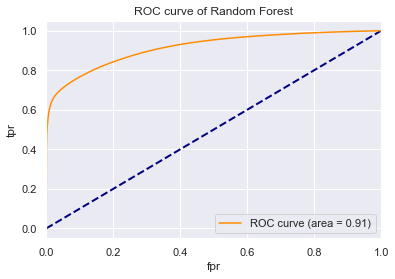

In [90]:
sns.set()
fpr,tpr,thresholds = roc_curve(y_test,rf_y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.title('ROC curve of Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,color='darkorange',label ='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [65]:
print('Acccuracy:',accuracy_score(y_test,rf_y_pred))

Acccuracy: 0.8912035686764521


In [89]:
print('Auc_score',roc_auc_score(y_test,rf_y_pred))

Auc_score 0.8210143205241873


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import warnings

# Create the hyperparameter grid

param_grid = {'n_estimators' : [10,50,100],
              'max_depth' : [10,50,100]
              'bootstrap' : ['True','False']
            }

# Instantiate the logistic regression classifier: logregw
dt = dt

# Instantiate the GridSearchCV object: logreg_cv
dt_cv = GridSearchCV(logreg, param_grid ,cv=5)

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(dt_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(dt_cv.best_score_))

print('Accuracy Score:', accuracy_score(dt_cv.predict(X_test), y_test))

# Ada boost

In [75]:
ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_y_pred = ad.predict(X_test)


accuracy - prediction:  0.8642056798772781


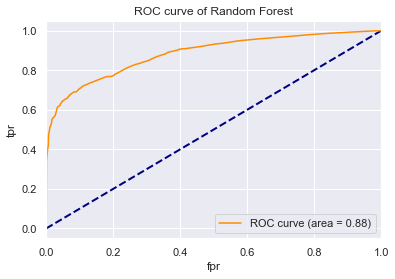

In [76]:
ad_y_pred_proba = ad.predict_proba(X_test)[:,1]
print('accuracy - prediction: ',accuracy_score(y_test,ad_y_pred))
sns.set()
fpr,tpr,thresholds = roc_curve(y_test,ad_y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.title('ROC curve of Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,color='darkorange',label ='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [77]:
print(classification_report(y_test,ad.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.98      0.91   1419617
           1       0.90      0.56      0.69    534721

    accuracy                           0.86   1954338
   macro avg       0.88      0.77      0.80   1954338
weighted avg       0.87      0.86      0.85   1954338



In [85]:
print(confusion_matrix(y_test,ad_y_pred))

[[1387637   31980]
 [ 233408  301313]]


# Gradiant Boosting Classifier

In [78]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_y_pred = gbc.predict(X_test)

In [79]:
gbc_y_pred_proba = gbc.predict_proba(X_test)[:,1]
print('accuracy - prediction: ',accuracy_score(y_test,gbc_y_pred))


accuracy - prediction:  0.8782150272880126


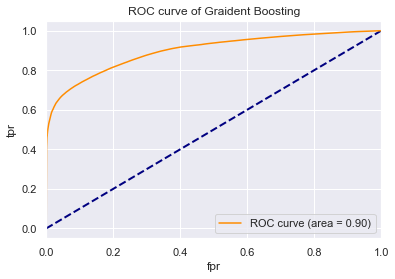

In [80]:
sns.set()
fpr,tpr,thresholds = roc_curve(y_test,gbc_y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.title('ROC curve of Graident Boosting')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,color='darkorange',label ='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

In [83]:
print(classification_report(y_test,gbc_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92   1419617
           1       0.90      0.63      0.74    534721

    accuracy                           0.88   1954338
   macro avg       0.89      0.80      0.83   1954338
weighted avg       0.88      0.88      0.87   1954338



In [84]:
print(confusion_matrix(y_test,gbc_y_pred))

[[1380918   38699]
 [ 199310  335411]]
